In [11]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates

In [18]:
# Load data
data = pd.read_csv("C:/Users/Charumathi/Desktop/housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [20]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [21]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


## Scale features

In [22]:
features = ['longitude', 'latitude', 'median_income']
select_df = data[features]
select_df.columns

Index(['longitude', 'latitude', 'median_income'], dtype='object')

In [23]:
# Scale the features
X = StandardScaler().fit_transform(select_df)
X[:5]

array([[-1.32783522,  1.05254828,  2.34476576],
       [-1.32284391,  1.04318455,  2.33223796],
       [-1.33282653,  1.03850269,  1.7826994 ],
       [-1.33781784,  1.03850269,  0.93296751],
       [-1.33781784,  1.03850269, -0.012881  ]])

## Train the model

In [24]:
kmeans = KMeans(n_clusters=6) # number of clusters must be specified
model = kmeans.fit(X)
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
centers = model.cluster_centers_
centers[:5]

array([[ 0.77136043, -0.82744211,  0.74012841],
       [-1.16194476,  1.27184564, -0.55149387],
       [ 0.87426725, -0.850258  , -0.57498506],
       [-1.18971662,  0.9721622 ,  0.86025579],
       [-0.07992107,  0.23030021, -0.65849757]])

In [10]:
centers.shape

(6, 3)

In [11]:
# Function that creates a DataFrame with a column for Cluster Number
def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [12]:
# Function that creates Parallel Plots
def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [13]:
P = pd_centers(features, centers)

In [14]:
# Returns the six clusters and their corresponding values for the centroids
P

,longitude,latitude,median_income,prediction
0,0.771556,-0.827619,0.737150,0
1,-1.190245,0.973817,0.851761,1
2,-0.080499,0.230933,-0.658293,2
3,0.200847,-0.371385,3.434079,3
4,0.874297,-0.850112,-0.576683,4
5,-1.161554,1.272813,-0.555645,5


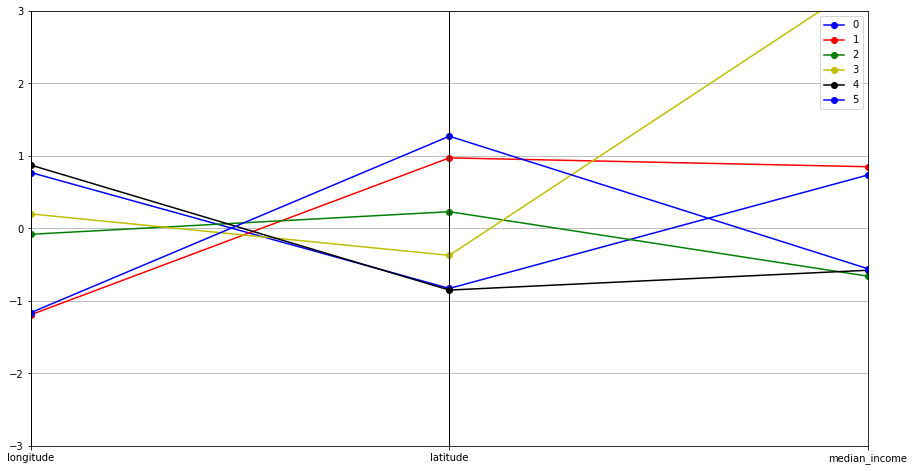

In [15]:
# Shows how different each cluster is across all features
parallel_plot(P)

In [16]:
# Create cluster label
data['econ_region'] = kmeans.fit_predict(X)
data['econ_region'] = data['econ_region'].astype("category")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,econ_region
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,2
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4


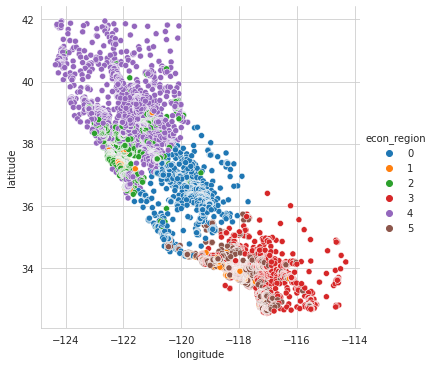

In [17]:
sns.set_style('whitegrid')
sns.relplot(x='longitude', y='latitude', hue='econ_region', data=data, kind='scatter');

In [18]:
median_attributes = ['econ_region', 'median_house_value', 'median_income', 'housing_median_age']
income_house = data[median_attributes]
income_house.groupby(['econ_region']).describe()

median_house_value                                          \
                         count           mean            std       min   
econ_region                                                              
0                       1656.0  104774.640097   68651.767862   26600.0   
1                        585.0  463011.960684   70684.119028  112500.0   
2                       2772.0  286386.250722  103511.306873   67500.0   
3                       6476.0  171894.436226   81291.548291   14999.0   
4                       4870.0  156778.981314   87029.460358   14999.0   
5                       4281.0  269696.464611  102021.861337   14999.0   

                                                    median_income             \
                  25%       50%       75%       max         count       mean   
econ_region                                                                    
0             61475.0   81550.0  117625.0  500001.0        1656.0   2.617763   
1            451400.0  500001.0  500001.0  500001.0         585.0  10.368468   
2            208075.0  270000.0  352175.0  500001.0        2772.0   5.506864   
3            116900.0  158000.0  200600.0  500001.0        6476.0   2.771492   
4             94325.0  134500.0  193275.0  500001.0        4870.0   2.824242   
5            192200.0  244400.0  331200.0  500001.0        4281.0   5.261110   

             ...                     housing_median_age                        \
             ...        75%      max              count       mean        std   
econ_region  ...                                                                
0            ...   3.202475   5.0100             1656.0  25.585749  11.143010   
1            ...  11.155700  15.0001              585.0  27.523077  13.966198   
2            ...   6.111400   9.5551             2772.0  27.127345  13.189785   
3            ...   3.399625   4.1293             6476.0  30.054509  11.594778   
4            ...   3.494075   4.5590             4870.0  30.645791  13.452059   
5            ...   5.897200   8.2531             4281.0  26.529549  12.246939   

                                          
             min   25%   50%   75%   max  
econ_region                               
0            2.0  17.0  25.0  34.0  52.0  
1            2.0  17.0  26.0  37.0  52.0  
2            1.0  17.0  26.0  36.0  52.0  
3            1.0  21.0  31.0  38.0  52.0  
4            2.0  19.0  30.0  42.0  52.0  
5            1.0  17.0  27.0  35.0  52.0  

[6 rows x 24 columns]

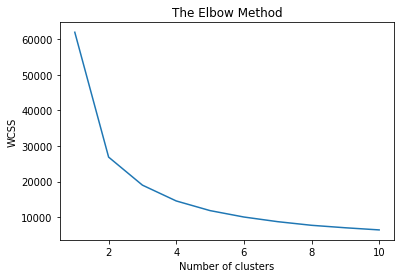

In [26]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans =KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [33]:
kmeans =KMeans(n_clusters = 3, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

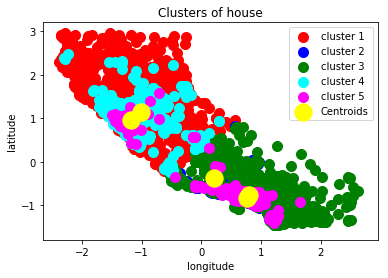

In [39]:
plt.scatter(X[y_kmeans== 0,0],X[y_kmeans == 0,1], s=100, c='red',label='cluster 1')
plt.scatter(X[y_kmeans== 1,0],X[y_kmeans == 1,1], s=100, c='blue',label='cluster 2')
plt.scatter(X[y_kmeans== 2,0],X[y_kmeans == 2,1], s=100, c='green',label='cluster 3')
plt.scatter(X[y_kmeans== 3,0],X[y_kmeans == 3,1], s=100, c='cyan',label='cluster 4')
plt.scatter(X[y_kmeans== 4,0],X[y_kmeans == 4,1], s=100, c='magenta',label='cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c= 'yellow', label='Centroids')
plt.title("Clusters of house")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.legend()
plt.show()